# **Week 4 Task -** Titanic Survival Project
---
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries and read Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Cureya Internship/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Cureya Internship/test.csv')

### **Data Preprocessing**

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
print('Shape of Dataset : ', train_df.shape)

Shape of Dataset :  (891, 12)


In [7]:
train_df.info()
print('\n\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclas

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]
print('Relation between features and survival : \n')
print("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train_df)*100.0))
print("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train_df)*100.0))
print("Total: %i"%len(train_df))

Relation between features and survival : 

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


**Pclass vs. Survival**

In [17]:
train_df.Pclass.value_counts()
pclass_survive = train_df.groupby('Pclass').Survived.value_counts()
pclass_survive

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

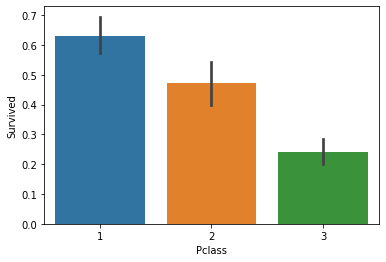

In [18]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

**Observations :** <br/>
* Higher class passengers have better survival chance.

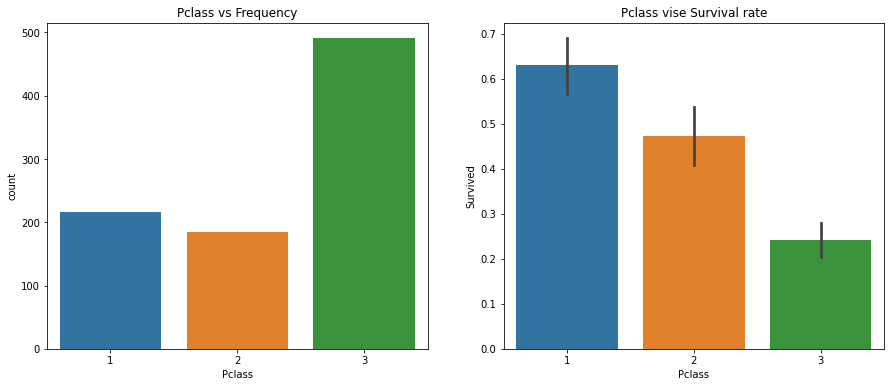

In [19]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
fig1_pclass = sns.countplot(data=train_df, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=train_df, x='Pclass',y='Survived', ax=axes[1])

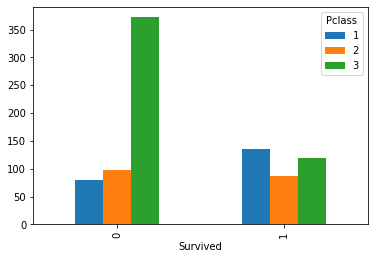

In [20]:
pclass_survive.unstack(level=0).plot(kind='bar', subplots=False)

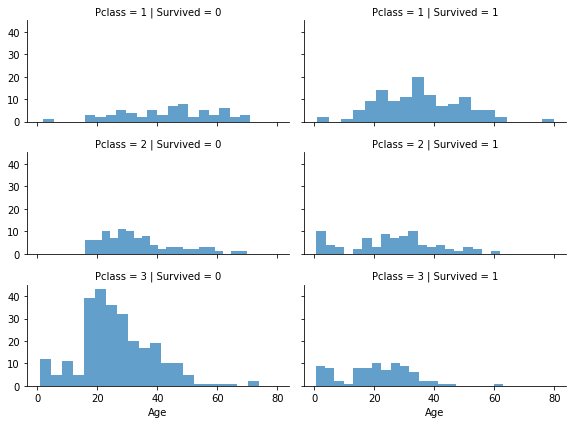

In [21]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2, aspect=2)
grid.map(plt.hist, 'Age', alpha=.7, bins=20)
grid.add_legend()

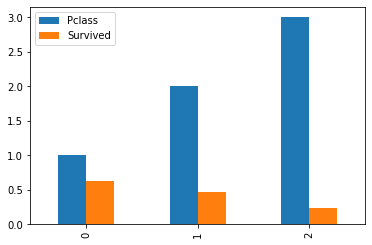

In [22]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().plot(kind='bar', subplots=False)

**Sex vs. Survival**

In [23]:
train_df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [24]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


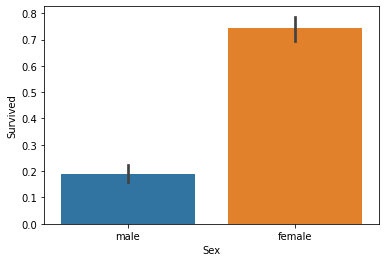

In [25]:
sns.barplot(x='Sex', y='Survived', data=train_df)

**Observations :** <br/>
* Females have better survival chance.

**Age & Sex vs. Survival**

Text(0.5, 1.0, 'Male')

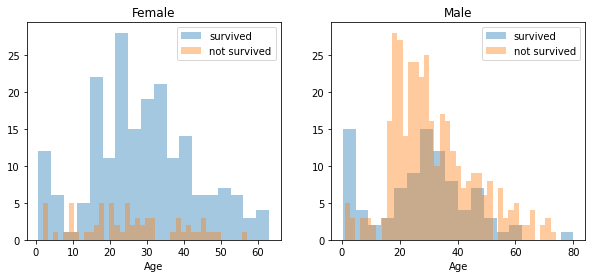

In [26]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

**Pclass & Sex vs. Survival**

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

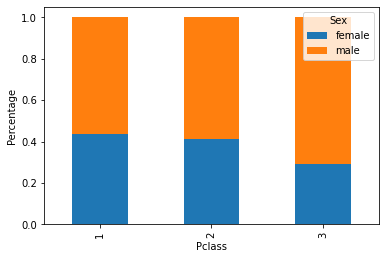

In [27]:
tab = pd.crosstab(train_df['Pclass'], train_df['Sex'])
print (tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

**Pclass, Sex & Embarked vs. Survival**

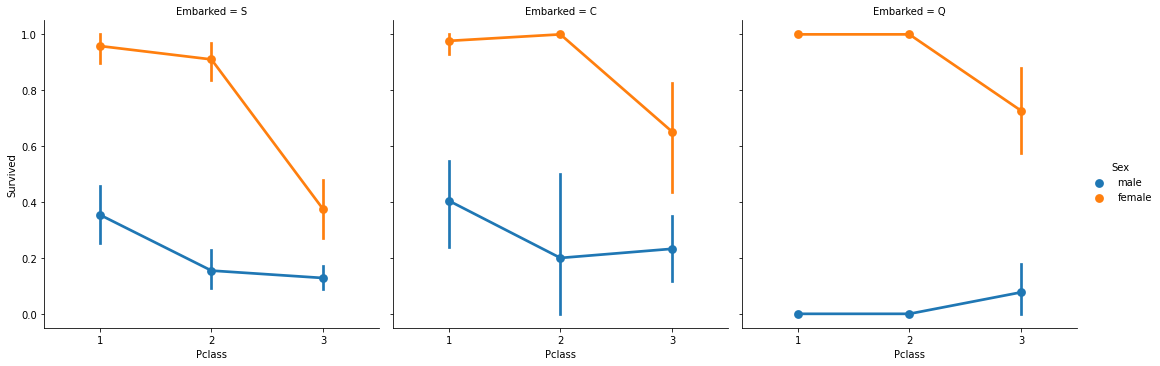

In [28]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_df)

**Observations :** <br/>
* Almost all females from Pclass 1 and 2 survived.
* Females dying were mostly from 3rd Pclass.
* Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

**Embarked vs. Survived**

In [29]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


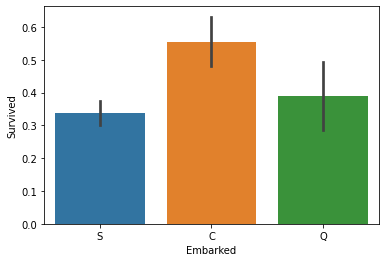

In [30]:
sns.barplot(x='Embarked', y='Survived', data=train_df)

**Parch vs. Survival**

In [31]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


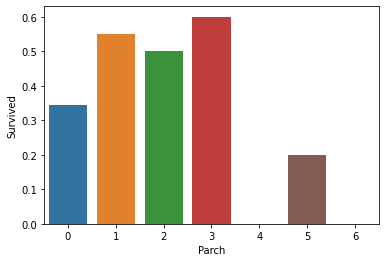

In [32]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train_df)

**Age vs. Survival**

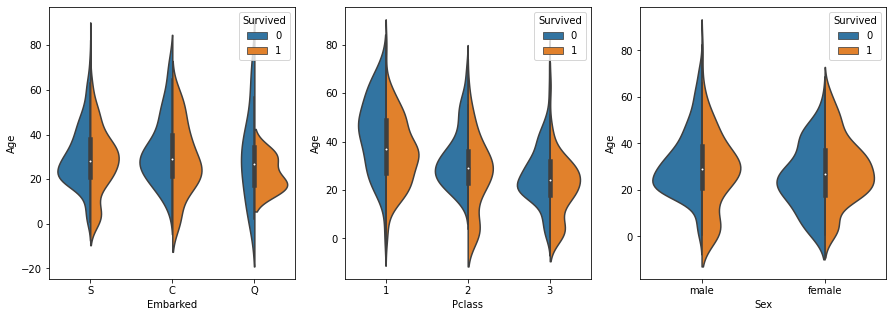

In [33]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_df, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax3)

**Observations :** 
<br/>
<br/>
Pclass violinplot
* 1st Pclass has very few children and more old people as compared to other two classes.
* Almost all children (between age 0 to 10) of 2nd Pclass survived.
* Most children of 3rd Pclass survived.
* Younger people of 1st Pclass survived as compared to its older people.

Sex violinplot
<br/>
* Most male children (between age 0 to 14) survived.
* Females with age between 18 to 40 have better survival chance.

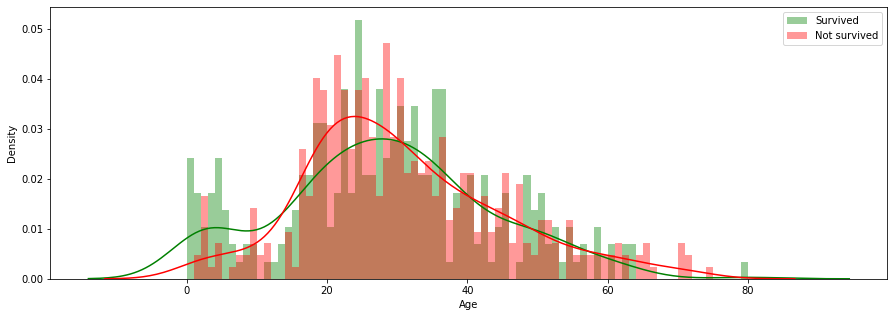

In [34]:
total_survived = train_df[train_df['Survived']==1]
total_not_survived = train_df[train_df['Survived']==0]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='green', label='Survived')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Age', label='Not survived')
plt.legend()

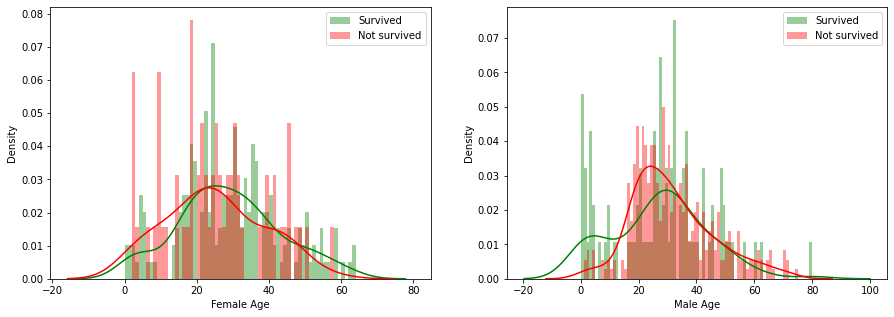

In [35]:
male_survived = train_df[(train_df['Survived']==1) & (train_df['Sex']=="male")]
female_survived = train_df[(train_df['Survived']==1) & (train_df['Sex']=="female")]

male_not_survived = train_df[(train_df['Survived']==0) & (train_df['Sex']=="male")]
female_not_survived = train_df[(train_df['Survived']==0) & (train_df['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='green', label='Survived')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Female Age', label='Not survived')
plt.legend()
plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='green', label='Survived')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Male Age', label='Not survived')
plt.legend()

**Correlating Features**

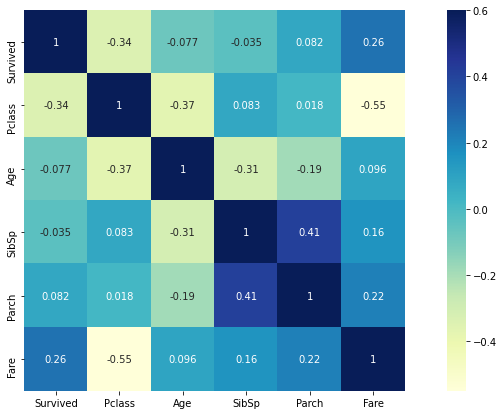

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(train_df.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True, cmap="YlGnBu")

**Feature Extraction**

In [37]:
mix_df = [train_df, test_df]

for df in mix_df:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')

In [38]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [39]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [40]:
for df in mix_df:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


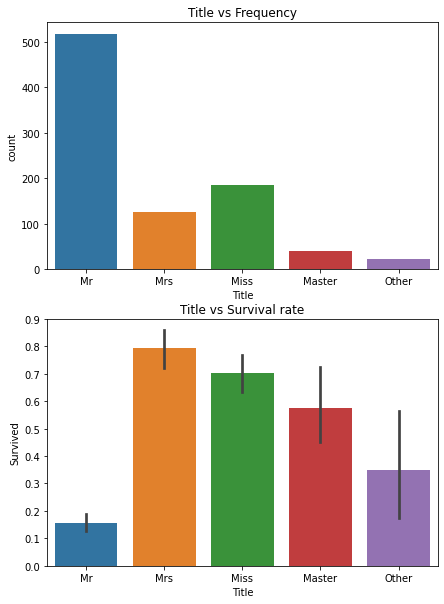

In [41]:
fx, axes = plt.subplots(2, 1, figsize=(7, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vs Survival rate")
fig1_title = sns.countplot(data=train_df, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=train_df, x='Title',y='Survived', ax=axes[1])

In [42]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for df in mix_df:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [43]:
for df in mix_df:
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


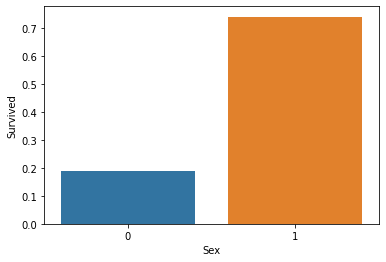

In [44]:
sns.barplot(x='Sex', y='Survived', ci=None, data=train_df)

In [45]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [46]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
for df in mix_df:
    df['Embarked'] = df['Embarked'].fillna('S')

In [48]:
for df in mix_df:
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,0,0.339009
1,1,0.553571
2,2,0.389610


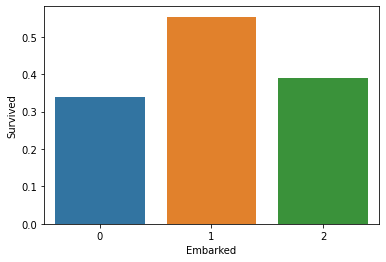

In [49]:
sns.barplot(x='Embarked', y='Survived', ci=None, data=train_df)

In [50]:
for df in mix_df:
    age_avg = df['Age'].mean()
    age_std = df['Age'].std()
    age_null_count = df['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    df['Age'][np.isnan(df['Age'])] = age_null_random_list
    df['Age'] = df['Age'].astype(int)
    
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
print(train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.526316
1   (16.0, 32.0]  0.352273
2   (32.0, 48.0]  0.373541
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [51]:
for df in mix_df:
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4

train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()

,Age,Survived
0,0,0.526316
1,1,0.352273
2,2,0.373541
3,3,0.434783
4,4,0.090909


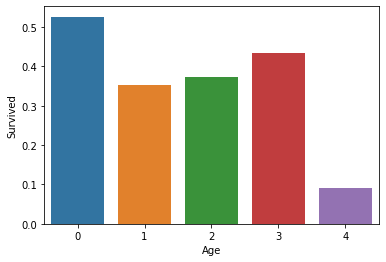

In [52]:
sns.barplot(x='Age', y='Survived', ci=None, data=train_df)

In [53]:
for df in mix_df:
    df['Fare'] = df['Fare'].fillna(train_df['Fare'].median())

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
print(train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [54]:
for df in mix_df:
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

train_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0,0.197309
1,1,0.308756
2,2,0.445415
3,3,0.581081


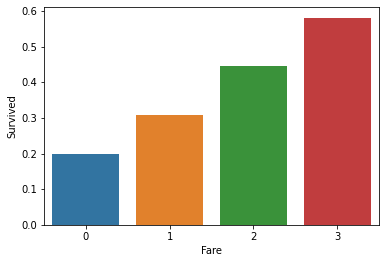

In [55]:
sns.barplot(x='Fare', y='Survived', ci=None, data=train_df)

In [56]:
for df in mix_df:
    df['FamilySize'] = df['SibSp'] +  df['Parch'] + 1

print(train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


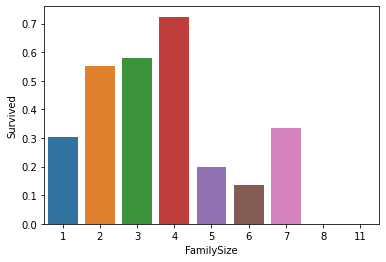

In [57]:
sns.barplot(x='FamilySize', y='Survived', ci=None, data=train_df)

**Observations :** <br/>
* Having FamilySize from 2 to 4 has better survival chance.
* FamilySize = 1, i.e. travelling alone has less survival chance.
* Large FamilySize (5 and above) also have less survival chance.

In [58]:
for df in mix_df:
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    
print(train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


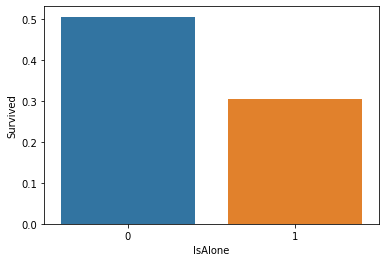

In [59]:
sns.barplot(x='IsAlone', y='Survived', ci=None, data=train_df)

**Feature Selection**

In [60]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train_df = train_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)
train_df = train_df.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [61]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64

In [62]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1
887,1,1,1,1,2,0,2,1
888,0,3,1,2,2,0,2,0
889,1,1,0,1,2,1,1,1


In [63]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
dtype: int64

In [64]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1,1,0,1,1
414,1306,1,1,2,3,1,5,1
415,1307,3,0,2,0,0,1,1
416,1308,3,0,1,1,0,1,1


### **Training and Testing Dataset**

In [65]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### **Logistic Regression**

In [66]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = round( lr_model.score(X_train, y_train) * 100, 2)

print('Training Accuracy : ',str(acc_lr) + '%')

Training Accuracy :  80.92%


In [67]:
y_check = np.random.choice(y_train.to_numpy(), 418, replace=False)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Metrix : \n',confusion_matrix(y_check, y_pred_lr))
print('\n\n',classification_report(y_check, y_pred_lr))

Confusion Metrix : 
 [[157  99]
 [104  58]]


               precision    recall  f1-score   support

           0       0.60      0.61      0.61       256
           1       0.37      0.36      0.36       162

    accuracy                           0.51       418
   macro avg       0.49      0.49      0.49       418
weighted avg       0.51      0.51      0.51       418



### **Support Vector Machine**

In [69]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svc = svm_model.predict(X_test)
acc_svc = round(svm_model.score(X_train, y_train) * 100, 2)

print('Training Accuracy : ',str(acc_svc) + '%')

Training Accuracy :  83.28%


In [70]:
print('Confusion Metrix : \n',confusion_matrix(y_check, y_pred_svc))
print('\n\n',classification_report(y_check, y_pred_svc))

Confusion Metrix : 
 [[161  95]
 [110  52]]


               precision    recall  f1-score   support

           0       0.59      0.63      0.61       256
           1       0.35      0.32      0.34       162

    accuracy                           0.51       418
   macro avg       0.47      0.47      0.47       418
weighted avg       0.50      0.51      0.50       418



### **Random Forest**

In [71]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = round(rf_model.score(X_train, y_train) * 100, 2)

print('Training Accuracy : ',str(acc_rf) + '%')

Training Accuracy :  86.87%


In [72]:
print('Confusion Metrix : \n',confusion_matrix(y_check, y_pred_rf))
print('\n\n',classification_report(y_check, y_pred_rf))

Confusion Metrix : 
 [[153 103]
 [104  58]]


               precision    recall  f1-score   support

           0       0.60      0.60      0.60       256
           1       0.36      0.36      0.36       162

    accuracy                           0.50       418
   macro avg       0.48      0.48      0.48       418
weighted avg       0.50      0.50      0.50       418



### **XGBoost**

In [73]:
from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = round(xgb_model.score(X_train, y_train) * 100, 2)

print('Training Accuracy : ',str(acc_xgb) + '%')

Training Accuracy :  84.29%


In [74]:
print('Confusion Metrix : \n',confusion_matrix(y_check, y_pred_xgb))
print('\n\n',classification_report(y_check, y_pred_xgb))

Confusion Metrix : 
 [[167  89]
 [105  57]]


               precision    recall  f1-score   support

           0       0.61      0.65      0.63       256
           1       0.39      0.35      0.37       162

    accuracy                           0.54       418
   macro avg       0.50      0.50      0.50       418
weighted avg       0.53      0.54      0.53       418



### **XGBoost**<br/>
(Using Cross Validation and GridSearchCV)

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

run = False

if run:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    xg = XGBClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(xg,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(X_train, y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = XGBClassifier(**parameters)
    model.fit(X_train, y_train)
    y_pred_xgb_grid = model.predict(X_test)
    
acc_xgb_grid = round(model.score(X_train, y_train) * 100, 2)
print('Training Accuracy : ',str(acc_xgb_grid) + '%')

Training Accuracy :  85.63%


In [76]:
acc_xgb_grid = round(model.score(X_train, y_train) * 100, 2)

print('Training Accuracy : ',str(acc_xgb_grid) + '%')

Training Accuracy :  85.63%


In [77]:
print('Confusion Metrix : \n',confusion_matrix(y_check, y_pred_xgb_grid))
print('\n\n',classification_report(y_check, y_pred_xgb_grid))

Confusion Metrix : 
 [[157  99]
 [105  57]]


               precision    recall  f1-score   support

           0       0.60      0.61      0.61       256
           1       0.37      0.35      0.36       162

    accuracy                           0.51       418
   macro avg       0.48      0.48      0.48       418
weighted avg       0.51      0.51      0.51       418



In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'XGBoost', 'XGBoost(GridsearchCV)'],
    'Score': [acc_lr, acc_svc, acc_rf, acc_xgb, acc_xgb_grid]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,86.87
4,XGBoost(GridsearchCV),85.63
3,XGBoost,84.29
1,Support Vector Machine,83.28
0,Logistic Regression,80.92


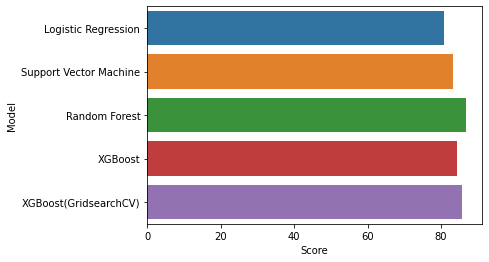

In [79]:
sns.barplot(x=models['Score'], y=models['Model'])

### Random Forest gives the best accuracy.